In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = r"C:\Users\Admins\Programming\Foundation of Data Science Projects\SCMission-2023_Round-3-Data-Đã clean.xlsm"

In [4]:
customer_df = pd.read_excel(path, sheet_name = 'Customer_Master')
customer_df.head()

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne


In [5]:
order_df = pd.read_excel(path, sheet_name = 'Sales_Order')
order_df.head()

,STT,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,Legit?,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg,Unnamed: 16,Unnamed: 17
0,1,2021-08-02,5233870,A044,3110685,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944,2.066,27698.4
1,2,2021-08-02,5233874,A044,3110678,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384,3.099,24921.6
2,3,2021-08-02,5233877,A044,3103449,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800,2.066,6480.0
3,4,2021-08-02,5233877,A044,3103450,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320,3.099,768.0
4,5,2021-08-02,5234064,A044,3110656,11002626,Yes,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080,2.068,3456.0


# Add Week Column

In [6]:
date1 = pd.Series(pd.date_range(
    start=pd.to_datetime(order_df['SOCreationDate'].iloc[0]),
    end=pd.to_datetime(order_df['SOCreationDate'].iloc[-1]) + pd.DateOffset(days=1),
    freq='W'
))
week_df = pd.DataFrame({'date_given': date1})
week_df['StartDate'] = week_df['date_given'].dt.to_period('W').dt.start_time
week_df['EndDate'] = week_df['date_given'].dt.to_period('W').dt.end_time

week_df['Week'] = 'Week' + (week_df.reset_index().index + 1).astype(str)
print(week_df.dtypes)

week_df

date_given    datetime64[ns]
StartDate     datetime64[ns]
EndDate       datetime64[ns]
Week                  object
dtype: object


,date_given,StartDate,EndDate,Week
0,2021-08-08,2021-08-02,2021-08-08 23:59:59.999999999,Week1
1,2021-08-15,2021-08-09,2021-08-15 23:59:59.999999999,Week2
2,2021-08-22,2021-08-16,2021-08-22 23:59:59.999999999,Week3
3,2021-08-29,2021-08-23,2021-08-29 23:59:59.999999999,Week4
4,2021-09-05,2021-08-30,2021-09-05 23:59:59.999999999,Week5
...,...,...,...,...
69,2022-12-04,2022-11-28,2022-12-04 23:59:59.999999999,Week70
70,2022-12-11,2022-12-05,2022-12-11 23:59:59.999999999,Week71
71,2022-12-18,2022-12-12,2022-12-18 23:59:59.999999999,Week72
72,2022-12-25,2022-12-19,2022-12-25 23:59:59.999999999,Week73


In [7]:
order_df['Week'] = "Week"
order_df.head()

,STT,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,Legit?,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg,Unnamed: 16,Unnamed: 17,Week
0,1,2021-08-02,5233870,A044,3110685,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944,2.066,27698.4,Week
1,2,2021-08-02,5233874,A044,3110678,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384,3.099,24921.6,Week
2,3,2021-08-02,5233877,A044,3103449,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800,2.066,6480.0,Week
3,4,2021-08-02,5233877,A044,3103450,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320,3.099,768.0,Week
4,5,2021-08-02,5234064,A044,3110656,11002626,Yes,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080,2.068,3456.0,Week


In [8]:
for i in range(week_df.shape[0]):
    order_df['Week'][order_df['SOCreationDate'].between(
                    week_df['StartDate'][i], 
                    week_df['EndDate'][i]
    )] = i + 1

order_df

C:\Users\Admins\AppData\Local\Temp\ipykernel_14812\423041876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df['Week'][order_df['SOCreationDate'].between(
C:\Users\Admins\AppData\Local\Temp\ipykernel_14812\423041876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df['Week'][order_df['SOCreationDate'].between(
C:\Users\Admins\AppData\Local\Temp\ipykernel_14812\423041876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,STT,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,Legit?,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg,Unnamed: 16,Unnamed: 17,Week
0,1,2021-08-02,5233870,A044,3110685,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944,2.066,27698.4,1
1,2,2021-08-02,5233874,A044,3110678,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384,3.099,24921.6,1
2,3,2021-08-02,5233877,A044,3103449,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800,2.066,6480.0,1
3,4,2021-08-02,5233877,A044,3103450,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320,3.099,768.0,1
4,5,2021-08-02,5234064,A044,3110656,11002626,Yes,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080,2.068,3456.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,28676,2022-12-31,5783479,A044,3110687,11002626,Yes,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,11911.6800,11911.6800,12243.8400,11911.6800,NaN,NaN,74
28676,28677,2022-12-31,5783497,A044,3110656,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,8338.1760,8338.1760,8552.5440,8338.1760,NaN,NaN,74
28677,28678,2022-12-31,5783497,A044,3110678,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,32130.4320,32130.4320,33027.2640,32130.4320,NaN,NaN,74
28678,28679,2022-12-31,5783497,A044,3110685,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,15470.2080,15470.2080,15868.3200,15470.2080,NaN,NaN,74


# Pipeline for Preprocessing Data

In [165]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

In [11]:
class OptinmalKSelect(BaseEstimator, TransformerMixin):
    def __init__(self, model, k_range, timings=True):
        self.model = model
        self.k_range = k_range
        self.optimal_kvalue = None
        self.timings = timings
    def fit(self, X, y = None):
        elbow_visualizer = KElbowVisualizer(KMeans(init=self.model, n_init = 10), 
                                            k=self.k_range, 
                                            timings=self.timings)
        elbow_visualizer.fit(X)
        self.optimal_kvalue = elbow_visualizer.elbow_value_
#         print(self.optimal_kvalue)
        return self
    def transform(self, X, y = None):
        return X
    def get_optimal_k(self):
        return self.optimal_kvalue

In [163]:
steps = [
    # Scale numerical featuers
    ('scaler', StandardScaler()),
    # Find the right kvalue
    ('optimal_kvalue', OptinmalKSelect(
        model='k-means++',
        k_range=(2,22),
        timings=True)
    ),
    ('kmeans', KMeans(init='k-means++', n_init=50))
]

pipeline = Pipeline(steps = steps)

# Cluster Data By Week and Save The Centroids Locations

In [146]:
final_df = pd.DataFrame(columns = ['CustomerRef', 'CustomerName', 
                                   'Longitude', 'Latitude', 
                                   'SumGrossWeightInKg', 'Week', 'Cluster', 
                                   'Centroids Longitude', 'Centroids Latitude', 'Centroids Height'])
final_df

,CustomerRef,CustomerName,Longitude,Latitude,SumGrossWeightInKg,Week,Cluster,Centroids Longitude,Centroids Latitude,Centroids Height


In [54]:
needed_data = customer_df[['CustomerRef', 'CustomerName', 'Longitude', 'Latitude']]
needed_data

,CustomerRef,CustomerName,Longitude,Latitude
0,11000128,Customer 48,145.206237,-38.025962
1,11000144,Customer 50,144.947676,-37.728991
2,11000149,Customer 51,152.519049,-32.197687
3,11000159,Customer 52,153.122555,-27.617230
4,11000176,Customer 53,145.197119,-37.990926
...,...,...,...,...
309,14021924,Customer 639,153.118374,-27.445906
310,14022011,Customer 640,153.103894,-27.425455
311,14022270,Customer 650,144.371612,-38.054289
312,14022376,Customer 855,147.383224,-35.121731


ADDING DATA OF WEEK 1
ADDING DATA OF WEEK 2
ADDING DATA OF WEEK 3
ADDING DATA OF WEEK 4
ADDING DATA OF WEEK 5
ADDING DATA OF WEEK 6
ADDING DATA OF WEEK 7
ADDING DATA OF WEEK 8
ADDING DATA OF WEEK 9
ADDING DATA OF WEEK 10
ADDING DATA OF WEEK 11
ADDING DATA OF WEEK 12
ADDING DATA OF WEEK 13
ADDING DATA OF WEEK 14
ADDING DATA OF WEEK 15
ADDING DATA OF WEEK 16
ADDING DATA OF WEEK 17
ADDING DATA OF WEEK 18
ADDING DATA OF WEEK 19
ADDING DATA OF WEEK 20
ADDING DATA OF WEEK 21
ADDING DATA OF WEEK 22
ADDING DATA OF WEEK 23
ADDING DATA OF WEEK 24
ADDING DATA OF WEEK 25
ADDING DATA OF WEEK 26
ADDING DATA OF WEEK 27
ADDING DATA OF WEEK 28
ADDING DATA OF WEEK 29
ADDING DATA OF WEEK 30
ADDING DATA OF WEEK 31
ADDING DATA OF WEEK 32
ADDING DATA OF WEEK 33
ADDING DATA OF WEEK 34
ADDING DATA OF WEEK 35
ADDING DATA OF WEEK 36
ADDING DATA OF WEEK 37
ADDING DATA OF WEEK 38
ADDING DATA OF WEEK 39
ADDING DATA OF WEEK 40
ADDING DATA OF WEEK 41
ADDING DATA OF WEEK 42
ADDING DATA OF WEEK 43
ADDING DATA OF WEEK 

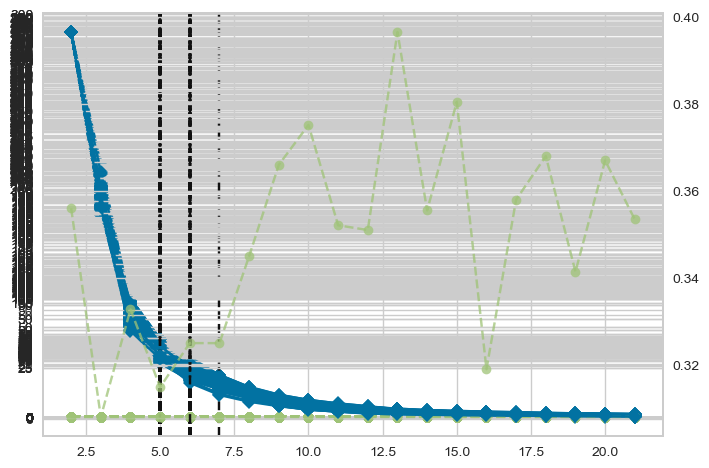

In [164]:
weeks = [i for i in range(1, 75)]
for week in weeks:
    print(f'ADDING DATA OF WEEK {week}')
    # Filter data
    one_week_df = order_df[order_df['Week'] == int(week)]
    sum_order_one_week = one_week_df.groupby(['CustomerRef'])['GrossWeightInKg'].sum().reset_index()
    sum_order_one_week = sum_order_one_week.rename(columns = {'GrossWeightInKg': 'SumGrossWeightInKg'})
    # Combine it to the same dataframe
    combined_df = pd.merge(needed_data, sum_order_one_week, on = 'CustomerRef')
    # Bring out features needed for clustering
    X = combined_df[['Longitude', 'Latitude', 'SumGrossWeightInKg']]
    
    # Fit data through pipeline
    pipeline.fit(X)
    optimal_k = pipeline.named_steps['optimal_kvalue'].get_optimal_k()
    pipeline.named_steps['kmeans'].set_params(n_clusters=optimal_k)
    pipeline.fit(X)
    
    # Temporary dataframe that combine all informations needed
    temp_df = combined_df
    temp_df['Week'] = int(week)
    
    temporary = pd.DataFrame()
    temporary['Longitude'] = X.loc[:, "Longitude"]
    temporary['Latitude'] = X.loc[:, "Latitude"]
    
    pred = pipeline.predict(X)
    try:
        temporary['Cluster'] = pred
    except ValueError:
        for n in range(temporary.shape[0] - (len(list(pred)))):
            temporary['Cluster'] = np.append(pred, np.nan)
    
    centroids = pipeline.named_steps['kmeans'].cluster_centers_
    cluster_info = [(float(i), centroid) for i, centroid in enumerate(centroids)]
    
    temp2 = pd.DataFrame()
    temp2['Cluster'], temp2['Centroids Longitude'], temp2['Centroids Latitude'], temp2['Centroids Height'] = zip(*[(name, centroid[0], centroid[1], centroid[2]) for name, centroid in cluster_info])
    
    temporary = pd.merge(temporary, temp2, on = 'Cluster')
    temp_df = pd.merge(temp_df, temporary, on = ['Longitude', 'Latitude'])
    
    final_df = pd.concat([final_df, temp_df], ignore_index=True)

In [167]:
final_df

,CustomerRef,CustomerName,Longitude,Latitude,SumGrossWeightInKg,Week,Cluster,Centroids Longitude,Centroids Latitude,Centroids Height
0,11000128,Customer 48,145.206237,-38.025962,465.7680,1,1.0,0.338166,-0.694359,-0.078871
1,11000181,Customer 54,130.857160,-12.431262,1146.0600,1,3.0,-1.168112,2.239596,-0.108099
2,11000185,Customer 55,115.921880,-32.000100,76.7280,1,0.0,-2.120785,-0.002064,-0.100626
3,11000299,Customer 59,152.364337,-24.862792,62.1024,1,4.0,0.729114,1.005722,-0.108051
4,11000301,Customer 61,150.502160,-23.322530,290.5944,1,4.0,0.729114,1.005722,-0.108051
...,...,...,...,...,...,...,...,...,...,...
12596,14021364,Customer 826,115.650286,-33.338060,470.3880,74,2.0,-2.659374,0.152919,-0.127323
12597,14021493,Customer 830,145.099558,-37.930993,1284.1920,74,0.0,-0.091785,-0.818533,-0.069542
12598,14021924,Customer 639,153.118374,-27.445906,1528.8000,74,1.0,0.754590,1.303072,-0.128817
12599,14022011,Customer 640,153.103894,-27.425455,122.3040,74,1.0,0.754590,1.303072,-0.128817


# Bring out the centroids coordinates

In [168]:
centroids_x = np.array(list(zip(final_df['Centroids Longitude'], 
                                final_df['Centroids Latitude'],
                                final_df['Centroids Height'])))

In [169]:
scaler = StandardScaler()

In [170]:
centroids_x = scaler.fit_transform(centroids_x)

In [172]:
centroids_x[:, 0:2]

array([[ 0.35851795, -0.74043773],
       [-1.25062567,  2.44095115],
       [-2.26835746,  0.01024133],
       ...,
       [ 0.80337937,  1.42544611],
       [ 0.80337937,  1.42544611],
       [ 0.61094642, -0.12977375]])

# Cluster the centroids to get the most general and cost efficient point for final centroids

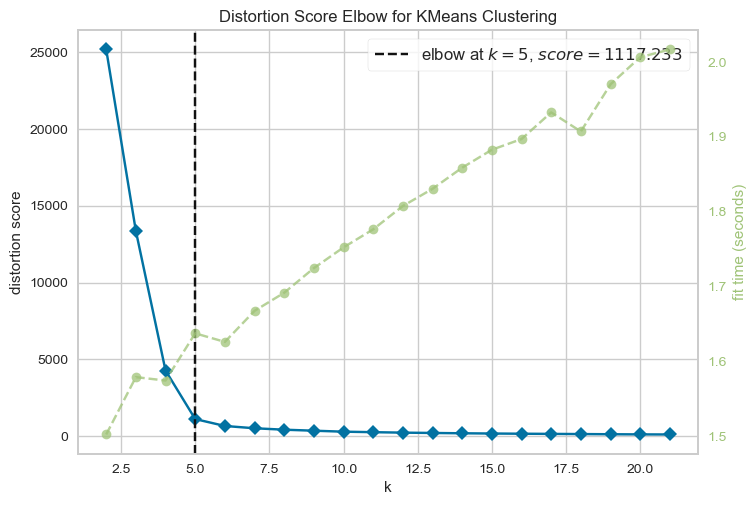

In [173]:
elbow = KElbowVisualizer(KMeans(init='k-means++', n_init = 50), 
                                            k=(2, 22), 
                                            timings=True)
elbow.fit(centroids_x)
elbow.show()
right_kvalue = elbow.elbow_value_

### Plot the centroids out

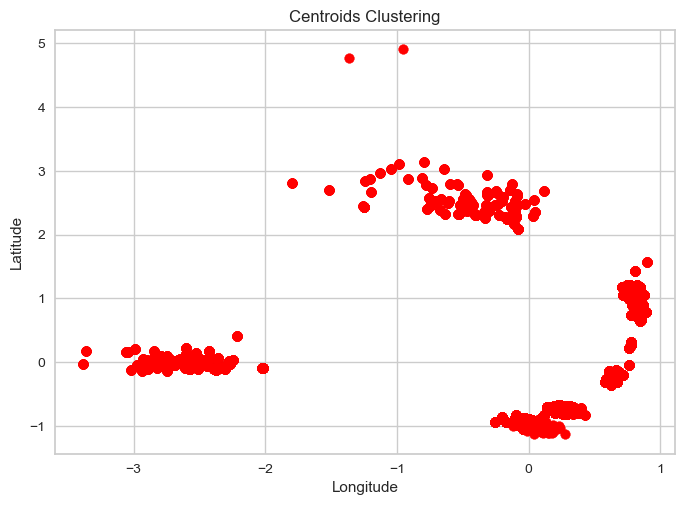

In [219]:
# Create a scatter plot
plt.scatter(centroids_x[:, 0], centroids_x[:, 1], c='red', cmap='viridis')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Centroids Clustering')

# Show the plot
plt.show()

In [176]:
kmeans = KMeans(init='k-means++', n_clusters = right_kvalue, n_init = 50)
kmeans.fit(centroids_x[:, 0:2])

pred = kmeans.predict(centroids_x[:, 0:2])
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

### Data for training using selected centroids

In [214]:
X = np.array(list(zip(customer_df['Longitude'], 
                      customer_df['Latitude'])))

In [215]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:10, :]

array([[ 0.16771051, -0.97926319],
       [ 0.14562094, -0.93122785],
       [ 0.79246371, -0.03653526],
       [ 0.84402284,  0.70435694],
       [ 0.16693154, -0.97359604],
       [-1.05816969,  3.16069867],
       [-2.33413079, -0.0045755 ],
       [ 0.13891382, -0.92826899],
       [ 0.37352215, -0.94754429],
       [ 0.09453097, -0.99252894]])

In [216]:
kmeans = KMeans(n_clusters=right_kvalue, 
                init=k_means_cluster_centers[:, 0:2], 
                n_init=10)
kmeans.fit(X)

C:\Users\Admins\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[ 0.18458203, -0.78243389],
       [-2.53726758, -0.00719359],
       [ 0.81508666,  0.89477842],
       [-0.42810773,  2.48791784],
       [ 0.67409916, -0.14570025]]),
       n_clusters=5, n_init=10)

In [217]:
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

### Visualization

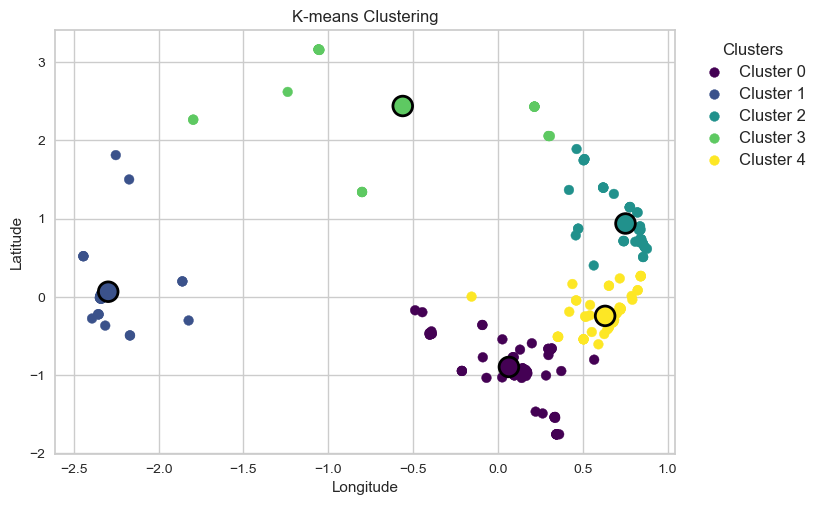

In [218]:
%matplotlib inline

# Scatter plot for data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')

# Scatter plot for centroids with thicker edge
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c=range(len(cluster_centers)), cmap='viridis', s=200, marker='o', edgecolor='black', linewidth=2)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')

# Create a legend
legend_elements = scatter.legend_elements()
legend_labels = [f'Cluster {i}' for i in range(len(legend_elements[0]))]
legend = plt.legend(legend_elements[0], legend_labels, loc='upper left', bbox_to_anchor=(1.02, 1), title='Clusters')

# Set the font size of the legend
for text in legend.get_texts():
    text.set_fontsize(12)

# Show the plot
plt.show()

### Create the answer sheet

In [185]:
task1_answer = pd.DataFrame(columns = ['CustomerName', "Cluster"])
task1_answer

,CustomerName,Cluster


### Add in the result

In [186]:
task1_answer['CustomerName'] = customer_df['CustomerName']
task1_answer['Cluster'] = cluster_labels + 1

task1_answer.head()

,CustomerName,Cluster
0,Customer 48,1
1,Customer 50,1
2,Customer 51,5
3,Customer 52,3
4,Customer 53,1


### Save the result dataframe to csv file

In [187]:
task1_answer.to_csv('D:\Task1.csv', index = False)